In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_absolute_error
data=pd.read_csv("input_game.csv")
#print(data.head(10))
pids1=data["p1_id"].unique()
pids2=data["p2_id"].unique()
pids=np.unique(np.concatenate([pids1,pids2]))
numofgames=(data["game_id"].unique()).shape[0]
p1in1=(data["p1_id"]==1).sum()
p1in2=(data["p2_id"]==1).sum()
print(pids)
print(p1in2)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201]
1438


For any player, we have defined four different types of plays that he can perform based on the opponent's previous action.
First, cooperation(coop), is when the previous action of the opponent was TRUST and seeing that, the current action of the player is also TRUST.
Second, deceit, is when the previous action of the opponent was TRUST and the current action of the player is CHEAT.
Third, punish, is when the previous action of the opponent was CHEAT and seeing that, the current action of the player is also CHEAT.
Fourth, pardon, is when the previous action of the opponent was CHEAT and the current action of the player is TRUST.
So, for a player, we take the games where he is player 1, analyse his actions by counting the number of times he performs the different types of plays. We also divide the number of times the plays does punish or pardon by number of times the opponent's previous action was CHEAT and same for cooperation and deceit, where we divide it by the number of times the opponent's previous actions were TRUST. We do the same when the said player is player 2 and take the averages of all the weighted values of different types of plays the player can perform. The same is repeated for all players.
   For each game, num of coop/num of times opponent trusted,num of deceit/num of times opponent trusted etc. are calculated and stored in the $store$ DataFrame

In [174]:
#storep1=pd.DataFrame(index=range(1,202),columns=["coop","deceit","punish","pardon"])
store=pd.DataFrame(index=range(1,202),columns=["coop","deceit","punish","pardon"])
for i in range(1,202):
  turns=data.loc[data["p1_id"]==i,["p1_action","p2_action","p2_id","turn"]]
  turns.reset_index(inplace=True)
  #print(turns.shape[0])
  cooppg=0
  punishpg=0
  deceitpg=0
  pardonpg=0
  opCheatpg=0
  opTrustpg=0
  coop=0
  punish=0
  deceit=0
  pardon=0
  for j in range(1,turns.shape[0]):
    if(turns["turn"].loc[turns.index[j]]<turns["turn"].loc[turns.index[j-1]]):
      if(opCheatpg!=0):
        pardonpg=pardonpg*1.0/opCheatpg
        punishpg=punishpg*1.0/opCheatpg
      if(opTrustpg!=0):
        deceitpg=deceitpg*1.0/opTrustpg
        cooppg=cooppg*1.0/opTrustpg
      coop+=cooppg
      punish+=punishpg
      deceit+=deceitpg
      pardon+=pardonpg
      cooppg=deceitpg=punishpg=pardonpg=opCheatpg=opTrustpg=0
    if(turns["p2_action"].loc[turns.index[j-1]]=="CHEAT" and turns["p1_action"].loc[turns.index[j]]=="TRUST"):
      pardonpg+=1
      opCheatpg+=1
    elif(turns["p2_action"].loc[turns.index[j-1]]=="CHEAT" and turns["p1_action"].loc[turns.index[j]]=="CHEAT"):
      punishpg+=1
      opCheatpg+=1
    elif(turns["p2_action"].loc[turns.index[j-1]]=="TRUST" and turns["p1_action"].loc[turns.index[j]]=="CHEAT"):
      deceitpg+=1
      opTrustpg+=1
    elif(turns["p2_action"].loc[turns.index[j-1]]=="TRUST" and turns["p1_action"].loc[turns.index[j]]=="TRUST"):
      cooppg+=1
      opTrustpg+=1
  gamesofp=(turns["p2_id"]).unique().shape[0]
  gamesofp=max(1,gamesofp)
  #print(gamesofp)
  coop/=gamesofp
  deceit/=gamesofp
  punish/=gamesofp
  pardon/=gamesofp
  store.loc[i]=[coop,deceit,punish,pardon]
  #storep1.loc[i]=[coop,deceit,punish,pardon]
for i in range(1,202):
  turns=data.loc[data["p2_id"]==i,["p1_action","p2_action","p1_id","turn"]]
  turns.reset_index(inplace=True)
  #print(turns.shape[0])
  cooppg=0
  punishpg=0
  deceitpg=0
  pardonpg=0
  opCheatpg=0
  opTrustpg=0
  coop=0
  punish=0
  deceit=0
  pardon=0
  for j in range(1,turns.shape[0]):
    if(turns["turn"].loc[turns.index[j]]<turns["turn"].loc[turns.index[j-1]]):
      if(opCheatpg!=0):
        pardonpg=pardonpg*1.0/opCheatpg
        punishpg=punishpg*1.0/opCheatpg
      if(opTrustpg!=0):
        deceitpg=deceitpg*1.0/opTrustpg
        cooppg=cooppg*1.0/opTrustpg
      coop+=cooppg
      punish+=punishpg
      deceit+=deceitpg
      pardon+=pardonpg
      cooppg=deceitpg=punishpg=pardonpg=opCheatpg=opTrustpg=0
    if(turns["p1_action"].loc[turns.index[j]]=="CHEAT" and turns["p2_action"].loc[turns.index[j]]=="TRUST"):
      pardonpg+=1
      opCheatpg+=1
    elif(turns["p1_action"].loc[turns.index[j]]=="CHEAT" and turns["p2_action"].loc[turns.index[j]]=="CHEAT"):
      punishpg+=1
      opCheatpg+=1
    elif(turns["p1_action"].loc[turns.index[j]]=="TRUST" and turns["p2_action"].loc[turns.index[j]]=="CHEAT"):
      deceitpg+=1
      opTrustpg+=1
    elif(turns["p1_action"].loc[turns.index[j]]=="TRUST" and turns["p2_action"].loc[turns.index[j]]=="TRUST"):
      cooppg+=1
      opTrustpg+=1
  gamesofp=(turns["p1_id"]).unique().shape[0]
  gamesofp=max(1,gamesofp)
  #print(gamesofp)
  coop/=gamesofp
  deceit/=gamesofp
  punish/=gamesofp
  pardon/=gamesofp
  store.loc[i]+=[coop,deceit,punish,pardon]
  #storep.loc[i]=[coop,deceit,punish,pardon]
print(store.T)
#corr_matrix=store.T.corr()


             1         2         3         4         5         6         7    \
coop     0.96544  1.591802  1.644016  0.059907  1.007291  1.282364  1.189962   
deceit   0.87997  0.168198  0.217456  1.778982  0.862457  0.495414  0.567391   
punish  0.875853  0.467755  0.629077  1.760818   0.76608  0.416467  0.573479   
pardon  0.969557  1.052245  1.184776  0.078071  1.103668  1.361311  1.117698   

             8         9         10   ...       192       193       194  \
coop    1.298046  1.616451  0.361909  ...  1.771822  1.393807  1.790373   
deceit  0.470704   0.09007  0.605833  ...  0.097226  0.067732  0.091571   
punish  0.369982  0.057605  0.506771  ...  0.104247  0.070668  0.056971   
pardon  1.398768  1.398916   0.46097  ...  1.681467  1.352409  1.824973   

             195       196       197       198       199       200       201  
coop    1.139093  1.352332  0.500996  0.496448  1.687305  0.906761   1.15335  
deceit  0.717429  0.469096  1.260543  0.450921  0.178766  0.53073

**CALCULATING THE CORRELATION**:
correlation matrix is made from the stored values of coop,deceit,punish,pardon. This is then plotted as a scatter plot. A heatmap is also made for better viusualisation.

<Axes: xlabel='index', ylabel='2'>

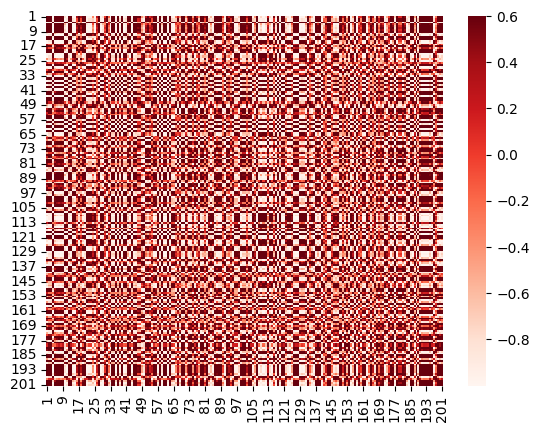

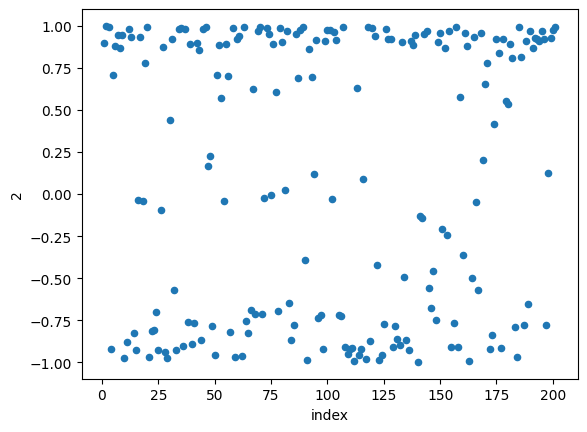

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pltt
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_absolute_error

corr_mat=pd.DataFrame(store.T)
corr_mat=corr_mat.apply(pd.to_numeric)
corr_mat=corr_mat.corr()
#print(corr_mat)
#corr_mat.reset_index(inplace=True)
#plt.scatter(corr_mat.corr(numeric_only=True))
#pltt.figure(figsize=(12,8))
#sns.set(font_scale=1.4)
sns.heatmap(corr_mat,cmap='Reds',annot=False,vmax=0.6)
corr_mat.reset_index().plot.scatter(x='index',y=2)
#print(corr_mat.info())

**MAKING SEGMENTS**:
For finding which players have the same strategy, we check if their corelation is higher than 0.95, is so, then they are considered to be in the same segment. There are some which appear to be independent, these are then manually checked and put in appropriate segments

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pltt
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_absolute_error
x = []
count=0
buff = corr_mat.to_numpy()[:, :]
b = np.zeros((201,1))
def maxi(arr):
    ans = 0
    for i in len(arr):
        if arr[i] < 1:
            ans = max(ans, arr[i])
    return ans
def search(a) :
    if a in x:
      return
    print(a, end = ": ")
    count = 0
    if a not in x :
        b[a-1] = 1
        x.append(a)
        for i in range(1,202) :
            if (buff[a-1][i-1] > 0.95 and buff[a-1][i-1] < 1)  :
                #print(i, "called inside search of ", a)
                if i in x:
                  continue
                x.append(i)
                print(i, end = " ")
                count+=1
#print(buff)
    print("", end = "\n")
    return count

for i in range(1,202) :
    search(i)

1: 6 7 8 9 13 19 27 31 39 43 55 60 61 76 88 95 99 104 120 121 126 127 128 133 137 139 144 161 162 175 178 181 186 188 191 192 193 194 196 200 
2: 3 12 20 34 35 37 45 46 58 63 69 70 73 79 82 86 89 100 101 103 107 118 150 154 157 168 185 190 195 201 
4: 11 14 15 21 22 23 25 28 33 36 38 40 44 57 62 65 85 108 110 111 115 119 124 129 130 131 136 155 158 163 172 183 197 
5: 56 87 
10: 29 50 59 84 91 98 109 112 114 117 123 132 135 140 177 184 
16: 18 47 48 54 72 81 94 102 116 142 151 166 
17: 42 52 74 80 92 138 149 152 165 176 182 199 
24: 32 49 66 68 71 78 106 125 145 156 164 173 187 
26: 
30: 53 67 77 93 113 159 169 174 179 180 
41: 
51: 171 
64: 83 96 97 105 146 148 167 189 
75: 141 153 198 
90: 160 
122: 147 
134: 
143: 
170: 


BELOW CODE CELL IS JUST TO CHECK THE GAMES OF EACH PLAYER

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pltt
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_absolute_error
print((data[data["p1_id"]==159]).to_string())

       game_id  p1_id  p2_id p1_action p2_action  turn
17401      296    159     44     TRUST     CHEAT   1.0
17402      296    159     44     CHEAT     TRUST   2.0
17403      296    159     44     TRUST     TRUST   3.0
17404      296    159     44     TRUST     TRUST   4.0
17405      296    159     44     TRUST     TRUST   5.0
17406      296    159     44     TRUST     CHEAT   6.0
17407      296    159     44     CHEAT     CHEAT   7.0
17408      296    159     44     CHEAT     CHEAT   8.0
17409      296    159     44     CHEAT     CHEAT   9.0
17410      296    159     44     CHEAT     TRUST  10.0
17411      296    159     44     TRUST     TRUST  11.0
17412      296    159     44     TRUST     TRUST  12.0
17413      296    159     44     TRUST     TRUST  13.0
17414      296    159     44     TRUST     CHEAT  14.0
17415      296    159     44     CHEAT     CHEAT  15.0
17416      296    159     44     CHEAT     CHEAT  16.0
17417      296    159     44     CHEAT     CHEAT  17.0
17418     

**IMPLEMENTING DIFFERENT STRATEGIES**: We weill be implementing the different strategies in the below code

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pltt
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_absolute_error
from enum import Enum
from typing import List

class Action(Enum):
    TRUST = 1
    CHEAT = 2
def tit_for_2_tat(past_self: List[Action], past_opponent: List[Action]) -> Action:
    if not past_opponent:
        return Action.TRUST
    elif len(past_opponent) == 1:
        return past_opponent[-1]
    else:
        if past_opponent[-1] == Action.CHEAT and past_opponent[-2] == Action.CHEAT:
            return Action.CHEAT
        else:
            return Action.TRUST
def always_cheat(past_self: List[Action], past_opponent: List[Action]) -> Action:
    return Action.CHEAT
def tit_for_tat(past_self: List[Action], past_opponent: List[Action]) -> Action:
    if not past_self:
        return Action.TRUST
    else:
        return past_opponent[-1]
def trigger(past_self: List[Action], past_opponent: List[Action]) -> Action:
    if not past_opponent:
        return Action.TRUST
    elif Action.CHEAT in past_opponent:
        return Action.CHEAT
    else:
        return Action.TRUST
def random_for_10_turns(past_self: List[Action], past_opponent: List[Action]) -> Action:
    if len(past_self) < 10:
        return random.choice([Action.TRUST, Action.CHEAT])
    else:
        return Action.TRUST
